# Final Project Notebook 4 - PCA

## Metadata

```

MacKenzye Leroy (zuf9mc@vriginia.edu)
DS 5001
2 May 2022

Purpose:  This notebook uses TFIDF data calculated in notebook 2 (FP_2_TFIDF.ipynb) to perform PCA on our Corpus. 
Note: Much of the code in the notebook was originally witten by Dr. Rafael Alverado and has been editted to fit my particular problem 
```

# Set Up

In [1]:
import pandas as pd
import numpy as np
from scipy.linalg import norm

In [2]:
import plotly.express as px
import seaborn as sns; sns.set()
import os

In [3]:
norm_docs = True # L2 norming
center_by_mean = True 
center_by_variance = False # Not supposed to ... Exaggerates significance of rare words
n_terms = 1000 # Number of significant words; feature space
k = 6 # Number of components

In [4]:
home_dir = os.getcwd()
home_dir

'/Users/mackenzyeleroy/Documents/MSDS/DS5001/ETA-Final-Project/FinalProject'

In [5]:
data_home = f"{home_dir}/Data"
parser_lib = f"{home_dir}/lib"
source_files = f'{data_home}/HGWellsAndJulesVerne'
data_prefix = 'wells-verne'

In [6]:
OHCO = ['book_id', 'chap_id']

# Prepare the Data

## Read in files

In [7]:
BOW = pd.read_csv(f"{data_home}/output/{data_prefix}-BOW.csv").set_index(OHCO+['term_str'])
VOCAB = pd.read_csv(f'{data_home}/output/{data_prefix}-VOCAB2.csv').set_index('term_str')
LIB = pd.read_csv(f'{data_home}/output/{data_prefix}-LIB.csv').set_index('book_id')

In [8]:
TFIDF = pd.read_csv(f'{data_home}/output/{data_prefix}-TFIDF.csv').fillna(0).set_index(['book_id', 'chap_id'])
TFIDF

0  000436  016   05  092        0h         1   10  \
book_id chap_id                                                        
35      1        0.0     0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
        2        0.0     0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
        3        0.0     0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
        4        0.0     0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
        5        0.0     0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
...              ...     ...  ...  ...  ...       ...       ...  ...   
44278   24       0.0     0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
        25       0.0     0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
        26       0.0     0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
        27       0.0     0.0  0.0  0.0  0.0  0.003805  0.000000  0.0   
        28       0.0     0.0  0.0  0.0  0.0  0.000000  0.001979  0.0   

                      100  1000  ...    â  âtrice  æsthetic  æstheticism  \
book_id chap_id                  ...                                       
35      1        0.000000   0.0  ...  0.0     0.0       0.0          0.0   
        2        0.000000   0.0  ...  0.0     0.0       0.0          0.0   
        3        0.000000   0.0  ...  0.0     0.0       0.0          0.0   
        4        0.000000   0.0  ...  0.0     0.0       0.0          0.0   
        5        0.000000   0.0  ...  0.0     0.0       0.0          0.0   
...                   ...   ...  ...  ...     ...       ...          ...   
44278   24       0.000000   0.0  ...  0.0     0.0       0.0          0.0   
        25       0.000000   0.0  ...  0.0     0.0       0.0          0.0   
        26       0.000000   0.0  ...  0.0     0.0       0.0          0.0   
        27       0.002145   0.0  ...  0.0     0.0       0.0          0.0   
        28       0.000000   0.0  ...  0.0     0.0       0.0          0.0   

                 éclat  épicier    ō  œdipus    α    β  
book_id chap_id                                         
35      1          0.0      0.0  0.0     0.0  0.0  0.0  
        2          0.0      0.0  0.0     0.0  0.0  0.0  
        3          0.0      0.0  0.0     0.0  0.0  0.0  
        4          0.0      0.0  0.0     0.0  0.0  0.0  
        5          0.0      0.0  0.0     0.0  0.0  0.0  
...                ...      ...  ...     ...  ...  ...  
44278   24         0.0      0.0  0.0     0.0  0.0  0.0  
        25         0.0      0.0  0.0     0.0  0.0  0.0  
        26         0.0      0.0  0.0     0.0  0.0  0.0  
        27         0.0      0.0  0.0     0.0  0.0  0.0  
        28         0.0      0.0  0.0     0.0  0.0  0.0  

[574 rows x 40079 columns]

## `LIB`

In [9]:
LIB.title = LIB.title.apply(lambda x: x[:45])
LIB

source_file_path  \
book_id                                                      
35                         WELLS__35__The_Time_Machine.txt   
44278         VERNE__44278__From_the_Earth_to_the_Moon.txt   
1355                 VERNE__1355__The_Underground_City.txt   
159            WELLS__159__The_Island_of_Doctor_Moreau.txt   
5230     WELLS__5230__The_Invisible_Man_A_Grotesque_Rom...   
36                    WELLS__36__The_War_of_the_Worlds.txt   
103        VERNE__103__Around_the_World_in_Eighty_Days.txt   
1013            WELLS__1013__The_First_Men_in_the_Moon.txt   
12163                 WELLS__12163__The_Sleeper_Awakes.txt   
18857    VERNE__18857__A_Journey_to_the_Centre_of_the_E...   
3526              VERNE__3526__Five_Weeks_in_a_Balloon.txt   
3091     VERNE__3091__Eight_Hundred_Leagues_on_the_Amaz...   
16457                VERNE__16457__All_Around_the_Moon.txt   
780                     WELLS__780__The_War_in_the_Air.txt   
1353                      VERNE__1353__Off_on_a_Comet!.txt   
164      VERNE__164__Twenty_Thousand_Leagues_under_the_...   
1059                   WELLS__1059__The_World_Set_Free.txt   
718                            WELLS__718__Tono-Bungay.txt   
6424                      WELLS__6424__A_Modern_Utopia.txt   
1268                VERNE__1268__The_Mysterious_Island.txt   

                                         title        author  \
book_id                                                        
35                            The Time Machine    WELLS, H.G   
44278               From the Earth to the Moon  VERNE, JULES   
1355                      The Underground City  VERNE, JULES   
159                The Island of Doctor Moreau    WELLS, H.G   
5230     The Invisible Man A Grotesque Romance    WELLS, H.G   
36                       The War of the Worlds    WELLS, H.G   
103            Around the World in Eighty Days  VERNE, JULES   
1013                 The First Men in the Moon    WELLS, H.G   
12163                       The Sleeper Awakes    WELLS, H.G   
18857     A Journey to the Centre of the Earth  VERNE, JULES   
3526                   Five Weeks in a Balloon  VERNE, JULES   
3091       Eight Hundred Leagues on the Amazon  VERNE, JULES   
16457                      All Around the Moon  VERNE, JULES   
780                         The War in the Air    WELLS, H.G   
1353                           Off on a Comet!  VERNE, JULES   
164      Twenty Thousand Leagues under the Sea  VERNE, JULES   
1059                        The World Set Free    WELLS, H.G   
718                                Tono-Bungay    WELLS, H.G   
6424                           A Modern Utopia    WELLS, H.G   
1268                     The Mysterious Island  VERNE, JULES   

                                        chap_regex  book_len  n_chaps  
book_id                                                                
35                      ^\s*CHAPTER\s+[[IVXLCM]+\.     32506       17  
44278                    ^\s*CHAPTER\s+[IVXLCM]+\.     40559       28  
1355                     ^\s*CHAPTER\s+[IVXLCM]+\.     43662       19  
159      (INTRODUCTION.)|^\s*CHAPTER\s+[IVXLCM]+\.     43782       23  
5230                     ^\s*CHAPTER\s+[IVXLCM]+\.     48562       28  
36                       ^\s*CHAPTER\s+[IVXLCM]+\.     60129       27  
103                      ^\s*CHAPTER\s+[IVXLCM]+\.     63114       37  
1013                     ^\s*CHAPTER\s+[IVXLCM]+\.     68534       26  
12163                         ^CHAPTER\s+[IVXLCM]+     75981       25  
18857                              ^CHAPTER\s+\d+$     86039       44  
3526                   ^\s*CHAPTER\s+[A-Z';, -]+\.     90793       44  
3091                     ^\s*CHAPTER\s+[IVXLCM]+\.     95162       40  
16457                    ^\s*CHAPTER\s+[IVXLCM]+\.     97152       24  
780                      ^\s*CHAPTER\s+[IVXLCM]+\.     98207       11  
1353                     ^\s*CHAPTER\s+[IVXLCM]+\.    100671       43  
164                                ^CHAPTER\

## `VOCAB`

In [10]:
SIGS = VOCAB.sort_values('dfidf', ascending=False).head(n_terms).index

In [11]:
SIGS

Index(['told', 'friends', 'present', 'master', 'held', 'different', 'foot',
       'best', 'covered', 'exclaimed',
       ...
       'enterprise', 'summit', 'eleven', 'series', 'travellers', 'party',
       'doctor', 'regarding', 'cries', 'believed'],
      dtype='object', name='term_str', length=1000)

## `TFIDF`

In [12]:
TFIDF

0  000436  016   05  092        0h         1   10  \
book_id chap_id                                                        
35      1        0.0     0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
        2        0.0     0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
        3        0.0     0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
        4        0.0     0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
        5        0.0     0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
...              ...     ...  ...  ...  ...       ...       ...  ...   
44278   24       0.0     0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
        25       0.0     0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
        26       0.0     0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
        27       0.0     0.0  0.0  0.0  0.0  0.003805  0.000000  0.0   
        28       0.0     0.0  0.0  0.0  0.0  0.000000  0.001979  0.0   

                      100  1000  ...    â  âtrice  æsthetic  æstheticism  \
book_id chap_id                  ...                                       
35      1        0.000000   0.0  ...  0.0     0.0       0.0          0.0   
        2        0.000000   0.0  ...  0.0     0.0       0.0          0.0   
        3        0.000000   0.0  ...  0.0     0.0       0.0          0.0   
        4        0.000000   0.0  ...  0.0     0.0       0.0          0.0   
        5        0.000000   0.0  ...  0.0     0.0       0.0          0.0   
...                   ...   ...  ...  ...     ...       ...          ...   
44278   24       0.000000   0.0  ...  0.0     0.0       0.0          0.0   
        25       0.000000   0.0  ...  0.0     0.0       0.0          0.0   
        26       0.000000   0.0  ...  0.0     0.0       0.0          0.0   
        27       0.002145   0.0  ...  0.0     0.0       0.0          0.0   
        28       0.000000   0.0  ...  0.0     0.0       0.0          0.0   

                 éclat  épicier    ō  œdipus    α    β  
book_id chap_id                                         
35      1          0.0      0.0  0.0     0.0  0.0  0.0  
        2          0.0      0.0  0.0     0.0  0.0  0.0  
        3          0.0      0.0  0.0     0.0  0.0  0.0  
        4          0.0      0.0  0.0     0.0  0.0  0.0  
        5          0.0      0.0  0.0     0.0  0.0  0.0  
...                ...      ...  ...     ...  ...  ...  
44278   24         0.0      0.0  0.0     0.0  0.0  0.0  
        25         0.0      0.0  0.0     0.0  0.0  0.0  
        26         0.0      0.0  0.0     0.0  0.0  0.0  
        27         0.0      0.0  0.0     0.0  0.0  0.0  
        28         0.0      0.0  0.0     0.0  0.0  0.0  

[574 rows x 40079 columns]

In [13]:
TFIDF = TFIDF[SIGS]

In [14]:
TFIDF

told   friends   present    master      held  different  \
book_id chap_id                                                                
35      1        0.000000  0.000000  0.000516  0.000255  0.000000   0.000259   
        2        0.000649  0.000000  0.000000  0.000000  0.000322   0.000000   
        3        0.000435  0.000000  0.000000  0.000000  0.000215   0.000000   
        4        0.000415  0.000000  0.000000  0.000000  0.000000   0.000000   
        5        0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   
...                   ...       ...       ...       ...       ...        ...   
44278   24       0.000000  0.000000  0.000471  0.000000  0.000000   0.000000   
        25       0.000000  0.001105  0.000000  0.000000  0.000275   0.000280   
        26       0.000000  0.000000  0.000331  0.000000  0.000000   0.000000   
        27       0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   
        28       0.000000  0.000733  0.000000  0.000000  0.000000   0.000000   

                     foot      best   covered  exclaimed  ...  enterprise  \
book_id chap_id                                           ...               
35      1        0.000000  0.000000  0.000000   0.000253  ...         0.0   
        2        0.000000  0.000000  0.000000   0.000000  ...         0.0   
        3        0.000000  0.000000  0.000000   0.000000  ...         0.0   
        4        0.000000  0.000000  0.000000   0.000000  ...         0.0   
        5        0.000515  0.000000  0.000000   0.000000  ...         0.0   
...                   ...       ...       ...        ...  ...         ...   
44278   24       0.000462  0.000462  0.000000   0.000000  ...         0.0   
        25       0.000000  0.000274  0.000274   0.000000  ...         0.0   
        26       0.000000  0.000000  0.000974   0.000000  ...         0.0   
        27       0.000000  0.000000  0.000591   0.000000  ...         0.0   
        28       0.000000  0.000000  0.000000   0.000000  ...         0.0   

                   summit  eleven    series  travellers  party    doctor  \
book_id chap_id                                                            
35      1        0.000000     0.0  0.000000    0.000000    0.0  0.000000   
        2        0.000000     0.0  0.000000    0.000000    0.0  0.000000   
        3        0.000000     0.0  0.000000    0.001609    0.0  0.001214   
        4        0.000000     0.0  0.000384    0.000000    0.0  0.000000   
        5        0.000000     0.0  0.000483    0.000000    0.0  0.000000   
...                   ...     ...       ...         ...    ...       ...   
44278   24       0.000868     0.0  0.000000    0.000000    0.0  0.000000   
        25       0.000514     0.0  0.000000    0.002569    0.0  0.000000   
        26       0.000000     0.0  0.000000    0.003048    0.0  0.000000   
        27       0.000000     0.0  0.000000    0.001110    0.0  0.000000   
        28       0.000000     0.0  0.000000    0.002728    0.0  0.000000   

                 regarding     cries  believed  
book_id chap_id                                 
35      1         0.000000  0.000000   0.00000  
        2         0.000000  0.000000   0.00000  
        3         0.000000  0.000000   0.00081  
        4         0.000000  0.000000   0.00000  
        5         0.000000  0.000000   0.00000  
...                    ...       ...       ...  
44278   24        0.000873  0.000000   0.00000  
        25        0.000000  0.000000   0.00000  
        26        0.000000  0.001840   0.00000  
        27        0.001117  0.001117   0.00000  
        28        0.001372  0.000000   0.00000  

[574 rows x 1000 columns]

## `DOC`

In [15]:
lib_cols = "author title".split()
DOC = pd.DataFrame(index=TFIDF.index)
DOC = DOC.join(LIB[lib_cols], on='book_id')

In [16]:
DOC['label'] = DOC.apply(lambda x: "{}-{}-{}".format(x.author, x.title, x.name[1]), 1)
DOC['mean_tfidf'] = TFIDF.mean(1)
DOC['n_tokens'] = BOW.groupby(['book_id','chap_id']).n.sum()

In [17]:
DOC

author                       title  \
book_id chap_id                                             
35      1          WELLS, H.G            The Time Machine   
        2          WELLS, H.G            The Time Machine   
        3          WELLS, H.G            The Time Machine   
        4          WELLS, H.G            The Time Machine   
        5          WELLS, H.G            The Time Machine   
...                       ...                         ...   
44278   24       VERNE, JULES  From the Earth to the Moon   
        25       VERNE, JULES  From the Earth to the Moon   
        26       VERNE, JULES  From the Earth to the Moon   
        27       VERNE, JULES  From the Earth to the Moon   
        28       VERNE, JULES  From the Earth to the Moon   

                                                      label  mean_tfidf  \
book_id chap_id                                                           
35      1                     WELLS, H.G-The Time Machine-1    0.000083   
        2                     WELLS, H.G-The Time Machine-2    0.000084   
        3                     WELLS, H.G-The Time Machine-3    0.000089   
        4                     WELLS, H.G-The Time Machine-4    0.000097   
        5                     WELLS, H.G-The Time Machine-5    0.000096   
...                                                     ...         ...   
44278   24       VERNE, JULES-From the Earth to the Moon-24    0.000111   
        25       VERNE, JULES-From the Earth to the Moon-25    0.000092   
        26       VERNE, JULES-From the Earth to the Moon-26    0.000100   
        27       VERNE, JULES-From the Earth to the Moon-27    0.000098   
        28       VERNE, JULES-From the Earth to the Moon-28    0.000100   

                 n_tokens  
book_id chap_id            
35      1            1691  
        2            1339  
        3            2000  
        4            2094  
        5            1665  
...                   ...  
44278   24            927  
        25           1566  
        26           1320  
        27            725  
        28            590  

[574 rows x 5 columns]

# Compute PCA

## Normalize doc vector lengths

We use TFIDF normalization, which scales documents by their pythagorean (Euclidean) length.

In [18]:
if norm_docs:
    print("L2 norming")
    TFIDF = TFIDF.apply(lambda x: x / norm(x), 1).fillna(0) # Euclidean norming

L2 norming


## Center term vectors

Note that we are taking the column-wise means -- the means for the _term_ vectors. Also, we do this *after* normalizing the documents.

**NOTE:** Some argue that centering alters the cosine angles.

In [19]:
if center_by_mean:
    print("Centering by mean")
    TFIDF = TFIDF - TFIDF.mean()

Centering by mean


## Normalize term vector variance

We do **not** normalize variance, which we would normally do, such as with data containing divergent units of measure. \
This is because to do so would exaggerate the importance of rare words (see Ng, 2008: 6m40s–8m00s).

In [20]:
if center_by_variance:
    print("Centering by variance")
    TFIDF = TFIDF / TFIDF.std()

## Compute Covariance Matrix

$n = |X| = |Y|$

$Cov(X,Y) = \dfrac{\sum_{i=1}^{n} (x_i - \mu_X) (y_i - \mu_Y)}{n - 1} = \dfrac{XY}{n-1}$

In [21]:
COV = TFIDF.cov()

In [22]:
# COV

In [23]:
COV.stack().sort_values().loc['moon']

mr           -0.001301
island       -0.001167
engineer     -0.001138
granite      -0.000989
door         -0.000887
                ...   
surface       0.001089
gun           0.001321
travellers    0.001636
earth         0.002421
moon          0.010629
Length: 1000, dtype: float64

## Decompose the Matrix


In [24]:
from scipy.linalg import eigh

In [25]:
w, v = eigh(COV, subset_by_index=(len(COV)-k,len(COV)-1))

In [26]:
pc_ids = list(reversed([i for i in range(k)]))

In [27]:
C = pd.DataFrame(w, columns=['eig_val'])
C.index = pc_ids
C = C.sort_index()
C.index.name = 'pc_id'
C['exp_var'] = C.eig_val / C.eig_val.sum()

In [28]:
C

eig_val   exp_var
pc_id                    
0      0.038497  0.253822
1      0.031759  0.209394
2      0.024224  0.159712
3      0.022251  0.146707
4      0.018089  0.119263
5      0.016851  0.111103

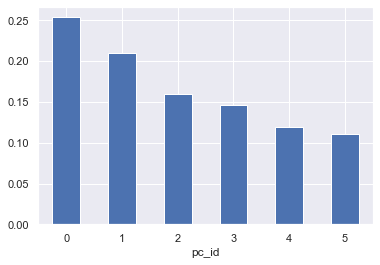

In [29]:
C.exp_var.plot.bar(rot=0);

In [30]:
L = pd.DataFrame(v, index=COV.index)
L.columns = pc_ids
L = L.T.sort_index().T
L.columns.name = 'pc_id'

In [31]:
# L[2].sort_values()

In [32]:
L.sample(20).style.background_gradient(cmap='GnBu', high=.5)

In [33]:
DCM = TFIDF.dot(L)

In [34]:
DCM.sample(20).style.background_gradient(cmap='GnBu', high=.5)

## Extract Poles

In [35]:
top_n = 6 # Number of top words for each pole
for i in range(k):
    for j, pole in enumerate(['neg','pos']):
        top_terms = ' '.join(L.sort_values(i, ascending=bool(j)).head(top_n).index.to_list())
        C.loc[i, pole] = top_terms

In [36]:
C

eig_val   exp_var                                         neg  \
pc_id                                                                   
0      0.038497  0.253822          people she things door machine her   
1      0.031759  0.209394  doctor balloon travellers lake gas country   
2      0.024224  0.159712    moon professor earth captain surface sun   
3      0.022251  0.146707           mr her she captain moon professor   
4      0.018089  0.119263        she her granite island moon engineer   
5      0.016851  0.111103    professor mr moon granite engineer earth   

                                                 pos  
pc_id                                                 
0      captain island engineer granite vessel doctor  
1         captain island engineer granite vessel sea  
2               mr engineer granite island house she  
3        granite island engineer trees machine house  
4                     mr captain door sir room ocean  
5                 captain she her land vessel doctor

# DCM Scatterplots

## PC 0 and 1

In [37]:
try:
    DOC = DOC.join(DCM)
except:
    pass

In [38]:
DOC

author                       title  \
book_id chap_id                                             
35      1          WELLS, H.G            The Time Machine   
        2          WELLS, H.G            The Time Machine   
        3          WELLS, H.G            The Time Machine   
        4          WELLS, H.G            The Time Machine   
        5          WELLS, H.G            The Time Machine   
...                       ...                         ...   
44278   24       VERNE, JULES  From the Earth to the Moon   
        25       VERNE, JULES  From the Earth to the Moon   
        26       VERNE, JULES  From the Earth to the Moon   
        27       VERNE, JULES  From the Earth to the Moon   
        28       VERNE, JULES  From the Earth to the Moon   

                                                      label  mean_tfidf  \
book_id chap_id                                                           
35      1                     WELLS, H.G-The Time Machine-1    0.000083   
        2                     WELLS, H.G-The Time Machine-2    0.000084   
        3                     WELLS, H.G-The Time Machine-3    0.000089   
        4                     WELLS, H.G-The Time Machine-4    0.000097   
        5                     WELLS, H.G-The Time Machine-5    0.000096   
...                                                     ...         ...   
44278   24       VERNE, JULES-From the Earth to the Moon-24    0.000111   
        25       VERNE, JULES-From the Earth to the Moon-25    0.000092   
        26       VERNE, JULES-From the Earth to the Moon-26    0.000100   
        27       VERNE, JULES-From the Earth to the Moon-27    0.000098   
        28       VERNE, JULES-From the Earth to the Moon-28    0.000100   

                 n_tokens         0         1         2         3         4  \
book_id chap_id                                                               
35      1            1691  0.114478  0.019887  0.076279 -0.004179 -0.007516   
        2            1339  0.209376  0.002864  0.019855 -0.121788 -0.103810   
        3            2000  0.256711  0.130516 -0.011568 -0.046213 -0.104071   
        4            2094  0.277570 -0.027477  0.109823 -0.234072 -0.098318   
        5            1665  0.267189 -0.036180  0.062285 -0.179837 -0.060342   
...                   ...       ...       ...       ...       ...       ...   
44278   24            927 -0.075642  0.011101  0.193299  0.095867  0.026813   
        25           1566 -0.119138 -0.005435  0.237833  0.133272  0.046579   
        26           1320 -0.011847  0.030844  0.112830  0.072360  0.068700   
        27            725 -0.041271  0.032715  0.132173  0.000957 -0.033231   
        28            590  0.001620  0.007999  0.241865  0.163197  0.137773   

                        5  
book_id chap_id            
35      1        0.083835  
        2        0.030510  
        3       -0.014529  
        4       -0.017344  
        5        0.017959  
...                   ...  
44278   24       0.179321  
        25       0.153627  
        26       0.083000  
        27       0.048150  
        28       0.099785  

[574 rows x 11 columns]

In [39]:
DOC.reset_index()[DOC.reset_index().book_id == 3526]

book_id  chap_id        author                    title  \
370     3526        1  VERNE, JULES  Five Weeks in a Balloon   
371     3526        2  VERNE, JULES  Five Weeks in a Balloon   
372     3526        3  VERNE, JULES  Five Weeks in a Balloon   
373     3526        4  VERNE, JULES  Five Weeks in a Balloon   
374     3526        5  VERNE, JULES  Five Weeks in a Balloon   
375     3526        6  VERNE, JULES  Five Weeks in a Balloon   
376     3526        7  VERNE, JULES  Five Weeks in a Balloon   
377     3526        8  VERNE, JULES  Five Weeks in a Balloon   
378     3526        9  VERNE, JULES  Five Weeks in a Balloon   
379     3526       10  VERNE, JULES  Five Weeks in a Balloon   
380     3526       11  VERNE, JULES  Five Weeks in a Balloon   
381     3526       12  VERNE, JULES  Five Weeks in a Balloon   
382     3526       13  VERNE, JULES  Five Weeks in a Balloon   
383     3526       14  VERNE, JULES  Five Weeks in a Balloon   
384     3526       15  VERNE, JULES  Five Weeks in a Balloon   
385     3526       16  VERNE, JULES  Five Weeks in a Balloon   
386     3526       17  VERNE, JULES  Five Weeks in a Balloon   
387     3526       18  VERNE, JULES  Five Weeks in a Balloon   
388     3526       19  VERNE, JULES  Five Weeks in a Balloon   
389     3526       20  VERNE, JULES  Five Weeks in a Balloon   
390     3526       21  VERNE, JULES  Five Weeks in a Balloon   
391     3526       22  VERNE, JULES  Five Weeks in a Balloon   
392     3526       23  VERNE, JULES  Five Weeks in a Balloon   
393     3526       24  VERNE, JULES  Five Weeks in a Balloon   
394     3526       25  VERNE, JULES  Five Weeks in a Balloon   
395     3526       26  VERNE, JULES  Five Weeks in a Balloon   
396     3526       27  VERNE, JULES  Five Weeks in a Balloon   
397     3526       28  VERNE, JULES  Five Weeks in a Balloon   
398     3526       29  VERNE, JULES  Five Weeks in a Balloon   
399     3526       30  VERNE, JULES  Five Weeks in a Balloon   
400     3526       31  VERNE, JULES  Five Weeks in a Balloon   
401     3526       32  VERNE, JULES  Five Weeks in a Balloon   
402     3526       33  VERNE, JULES  Five Weeks in a Balloon   
403     3526       34  VERNE, JULES  Five Weeks in a Balloon   
404     3526       35  VERNE, JULES  Five Weeks in a Balloon   
405     3526       36  VERNE, JULES  Five Weeks in a Balloon   
406     3526       37  VERNE, JULES  Five Weeks in a Balloon   
407     3526       38  VERNE, JULES  Five Weeks in a Balloon   
408     3526       39  VERNE, JULES  Five Weeks in a Balloon   
409     3526       40  VERNE, JULES  Five Weeks in a Balloon   
410     3526       41  VERNE, JULES  Five Weeks in a Balloon   
411     3526       42  VERNE, JULES  Five Weeks in a Balloon   
412     3526       43  VERNE, JULES  Five Weeks in a Balloon   
413     3526       44  VERNE, JULES  Five Weeks in a Balloon   

                                       label  mean_tfidf  n_tokens         0  \
370   VERNE, JULES-Five Weeks in a Balloon-1    0.000085      2253 -0.100230   
371   VERNE, JULES-Five Weeks in a Balloon-2    0.000074      1021 -0.081758   
372   VERNE, JULES-Five Weeks in a Balloon-3    0.000098      2342 -0.044608   
373   VERNE, JULES-Five Weeks in a Balloon-4    0.000093      1617 -0.157537   
374   VERNE, JULES-Five Weeks in a Balloon-5    0.000090      1679 -0.178821   
375   VERNE, JULES-Five Weeks in a Balloon-6    0.000090      1537 -0.060853   
376   VERNE, JULES-Five Weeks in a Balloon-7    0.000120      1433 -0.138885   
377   VERNE, JULES-Five Weeks in a Balloon-8    0.000098      1939 -0.184237   
378   VERNE, JULES-Five Weeks in a Balloon-9    0.000100      1487 -0.118932   
379  VERNE, JULES-Five Weeks in a Balloon-10    0.000095      1551 -0.140159   
380  VERNE, JULES-Five Weeks in a Balloon-11    0.000105      1978 -0.282056   
381  VERNE, JULES-Five Weeks in a Balloon-12    0.000098      2549 -0.174403   
382  VERNE, JULES-Five Weeks in a Balloon-13    0.000109      2017 -0.143339   
383 

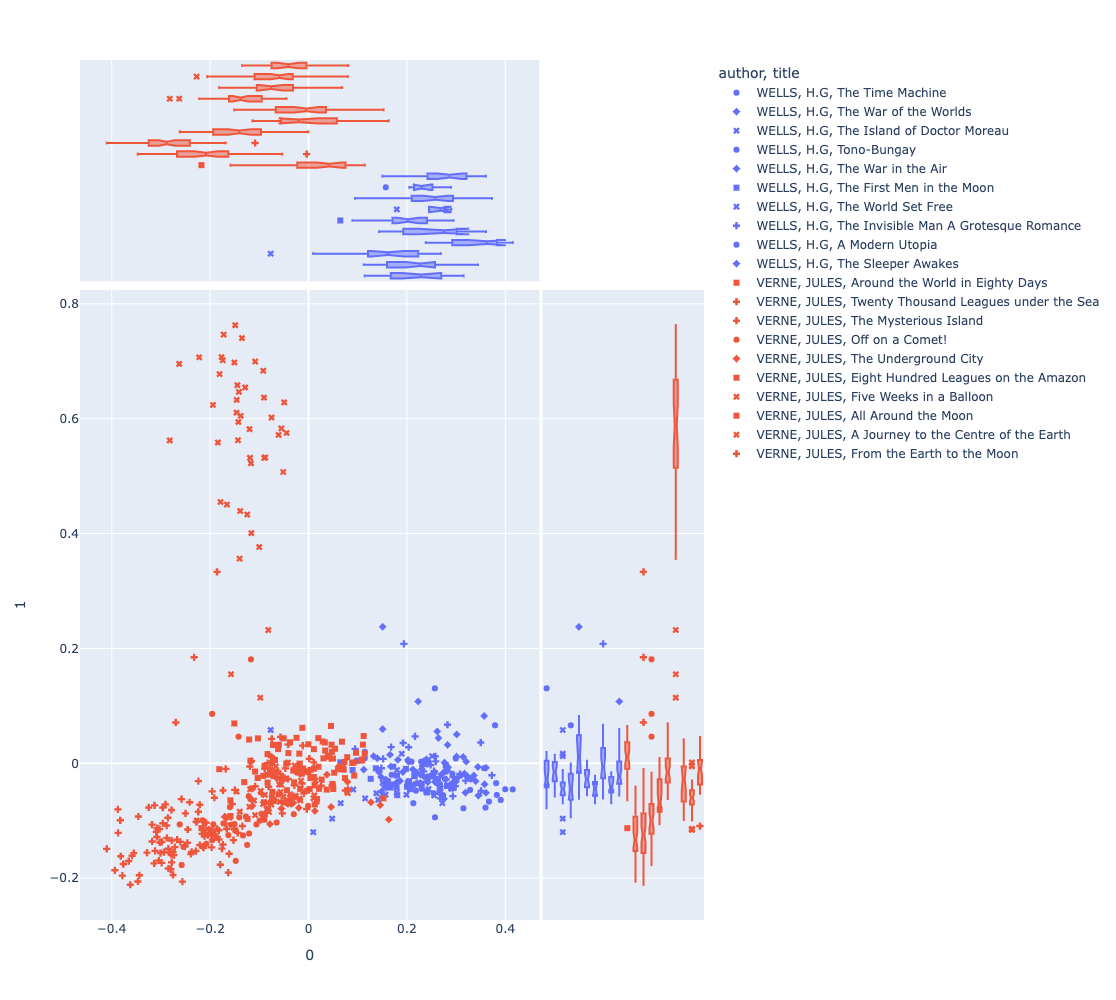

In [40]:
px.scatter(DOC, 0, 1, 
           color='author', symbol='title', 
           hover_name='label', 
           marginal_x='box', marginal_y='box', 
           height=1000,
          )

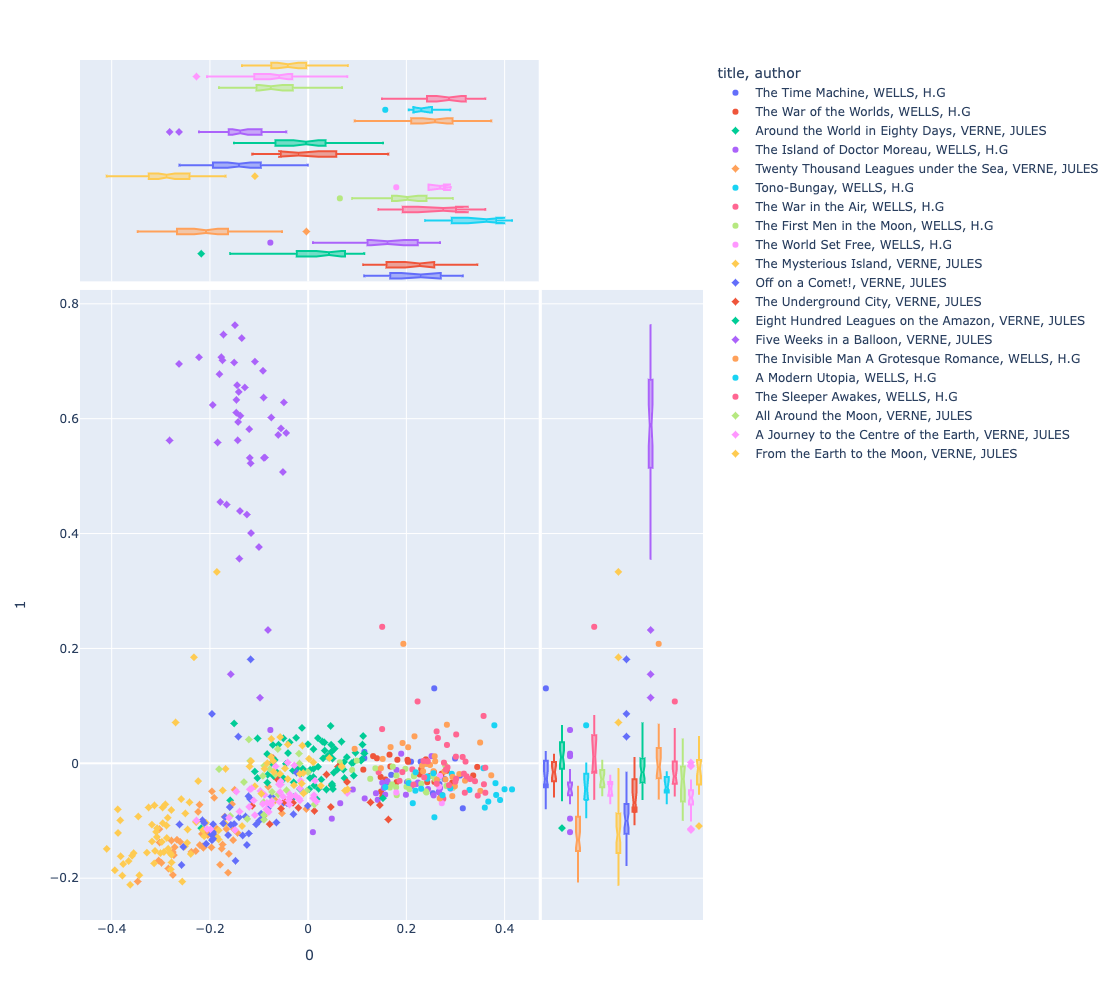

In [41]:
px.scatter(DOC, 0, 1, 
           color='title', symbol='author', 
           hover_name='label', 
           marginal_x='box', marginal_y='box', 
           height=1000)

In [42]:
C.loc[[0,1]]

eig_val   exp_var                                         neg  \
pc_id                                                                   
0      0.038497  0.253822          people she things door machine her   
1      0.031759  0.209394  doctor balloon travellers lake gas country   

                                                 pos  
pc_id                                                 
0      captain island engineer granite vessel doctor  
1         captain island engineer granite vessel sea

## PC 2 and 3

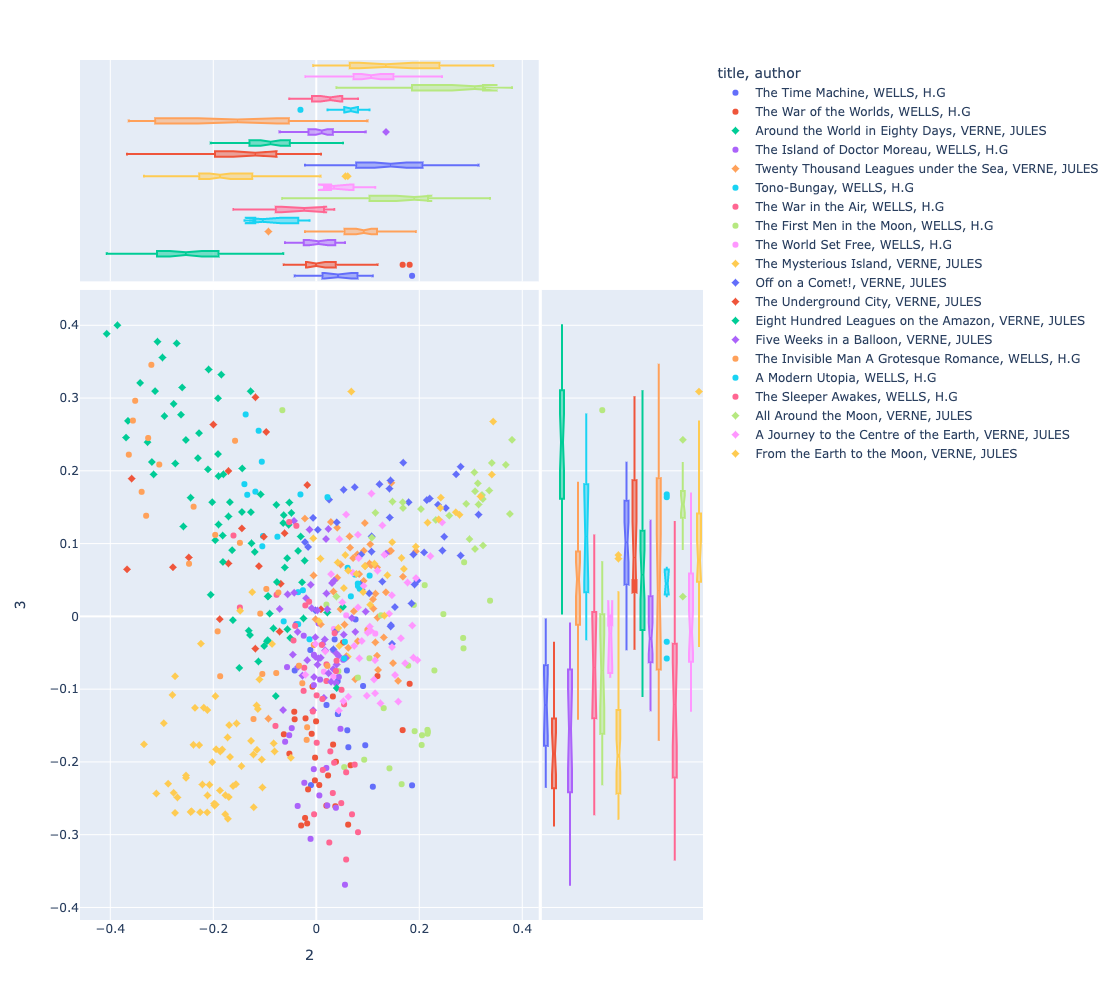

In [43]:
px.scatter(DOC, 2, 3, 
           color='title', symbol='author', 
           hover_name='label', 
           marginal_x='box', marginal_y='box', 
           height=1000)

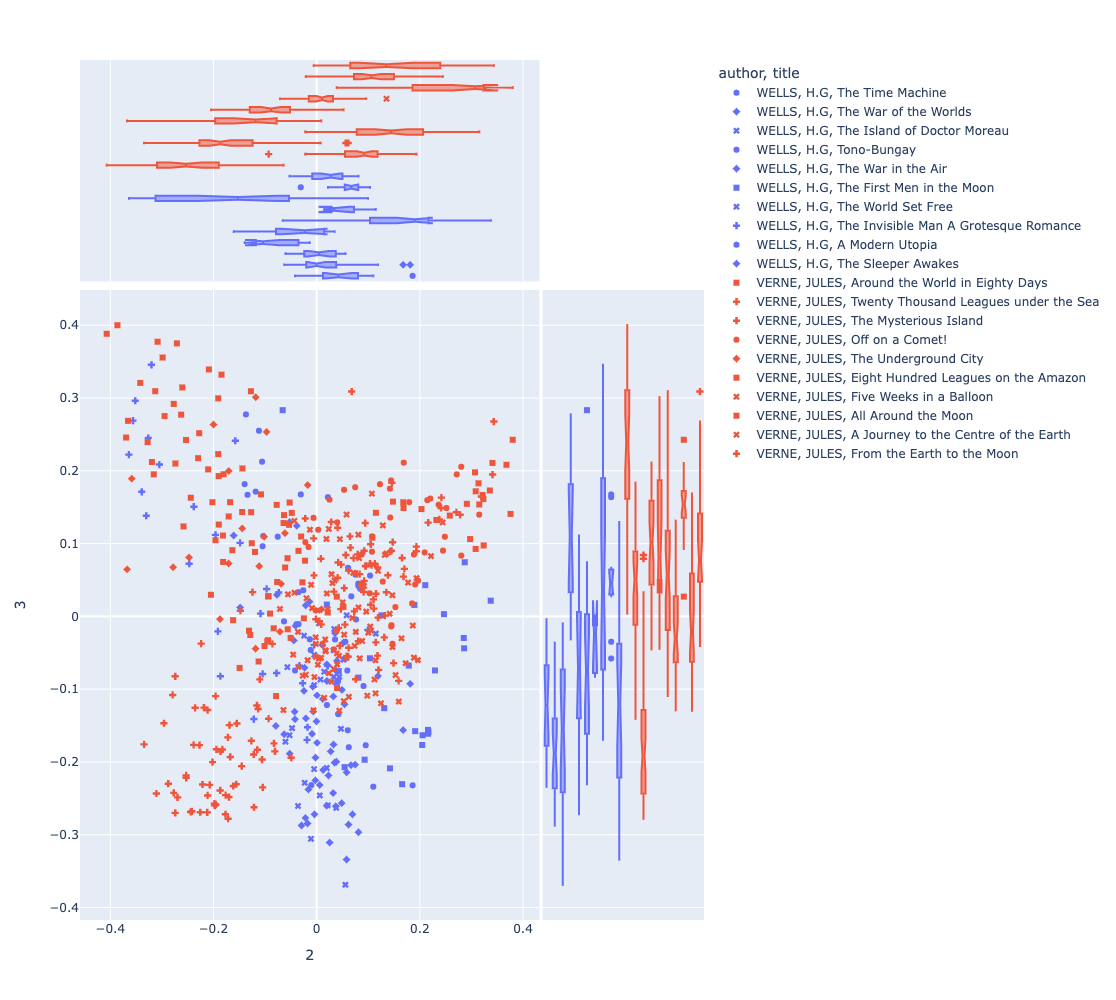

In [44]:
px.scatter(DOC, 2, 3, 
           color='author', symbol='title', 
           hover_name='label', 
           marginal_x='box', marginal_y='box', 
           height=1000)

In [45]:
C.loc[[2,3]]

eig_val   exp_var                                       neg  \
pc_id                                                                 
2      0.024224  0.159712  moon professor earth captain surface sun   
3      0.022251  0.146707         mr her she captain moon professor   

                                               pos  
pc_id                                               
2             mr engineer granite island house she  
3      granite island engineer trees machine house

## PC 4 and 5

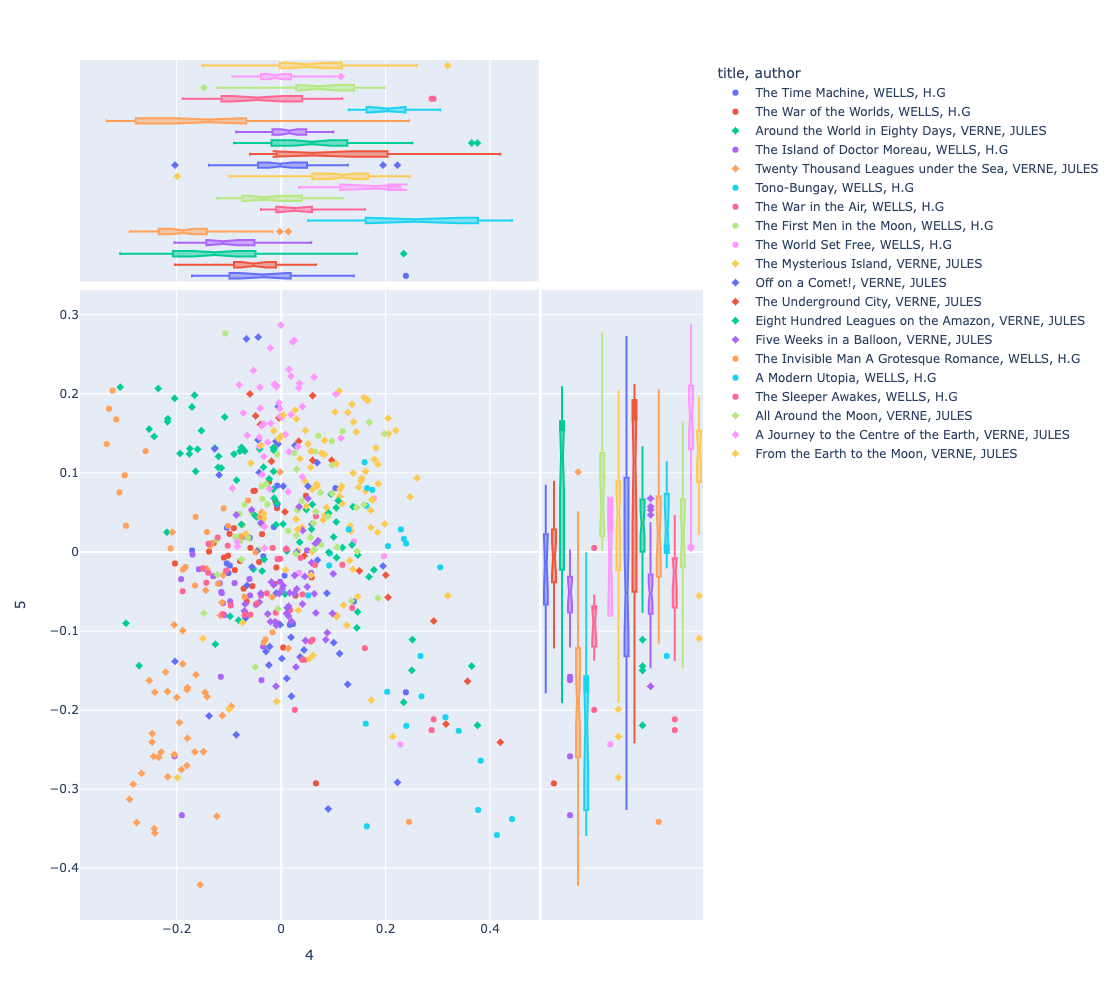

In [46]:
px.scatter(DOC, 4, 5, 
           color='title', symbol='author', 
           hover_name='label', 
           marginal_x='box', marginal_y='box', 
           height=1000)

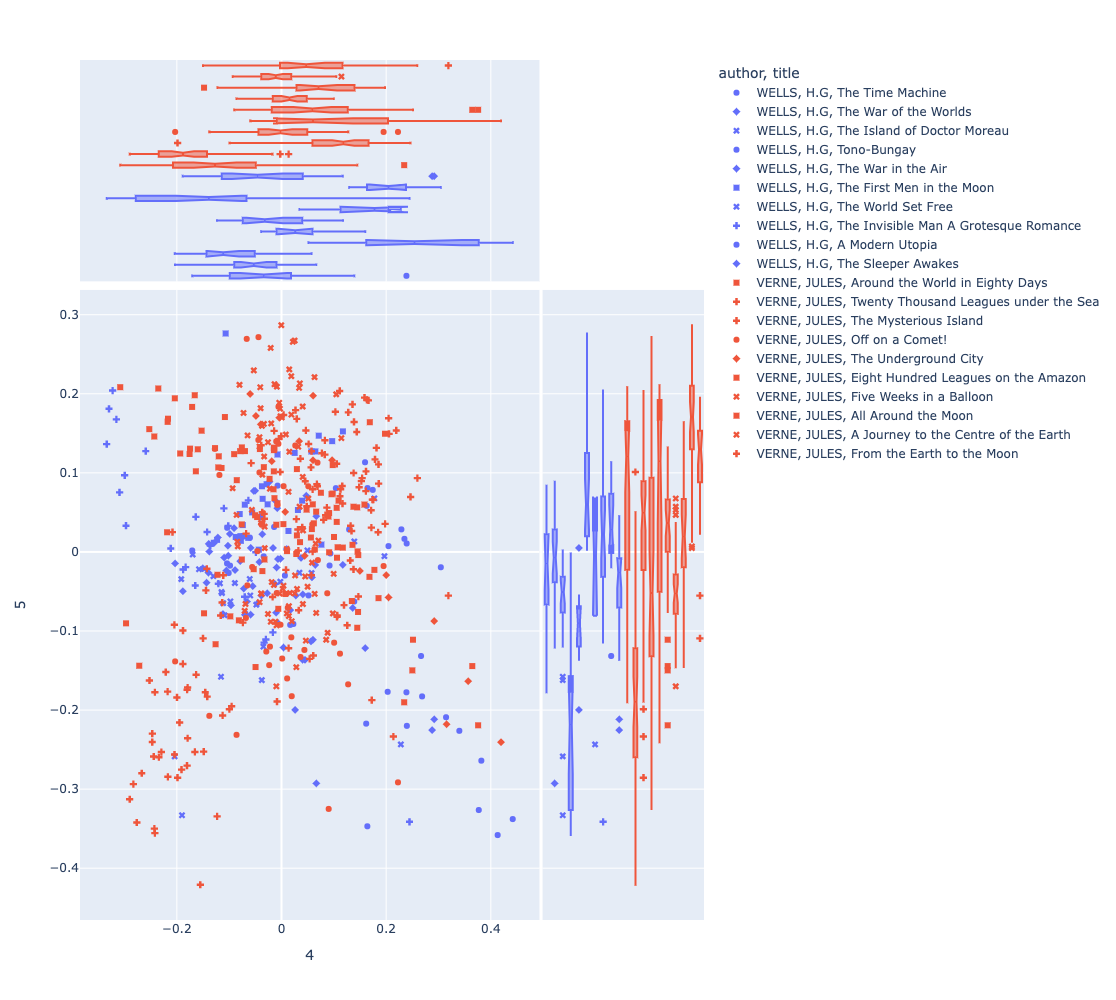

In [47]:
px.scatter(DOC, 4, 5, 
           color='author', symbol='title', 
           hover_name='label', 
           marginal_x='box', marginal_y='box', 
           height=1000)

# Components by Books

In [48]:
os.chdir(parser_lib)
from hac2 import HAC
os.chdir(home_dir)

In [49]:
BCM = DCM.groupby('book_id').mean().sort_index()
BCM.index = LIB.loc[list(BCM.index)].source_file_path

In [50]:
BCM.sort_values(0, ascending=False).style.background_gradient(cmap='GnBu', high=.5, axis=0)

In [51]:
C[['neg','pos']]

neg  \
pc_id                                               
0              people she things door machine her   
1      doctor balloon travellers lake gas country   
2        moon professor earth captain surface sun   
3               mr her she captain moon professor   
4            she her granite island moon engineer   
5        professor mr moon granite engineer earth   

                                                 pos  
pc_id                                                 
0      captain island engineer granite vessel doctor  
1         captain island engineer granite vessel sea  
2               mr engineer granite island house she  
3        granite island engineer trees machine house  
4                     mr captain door sir room ocean  
5                 captain she her land vessel doctor

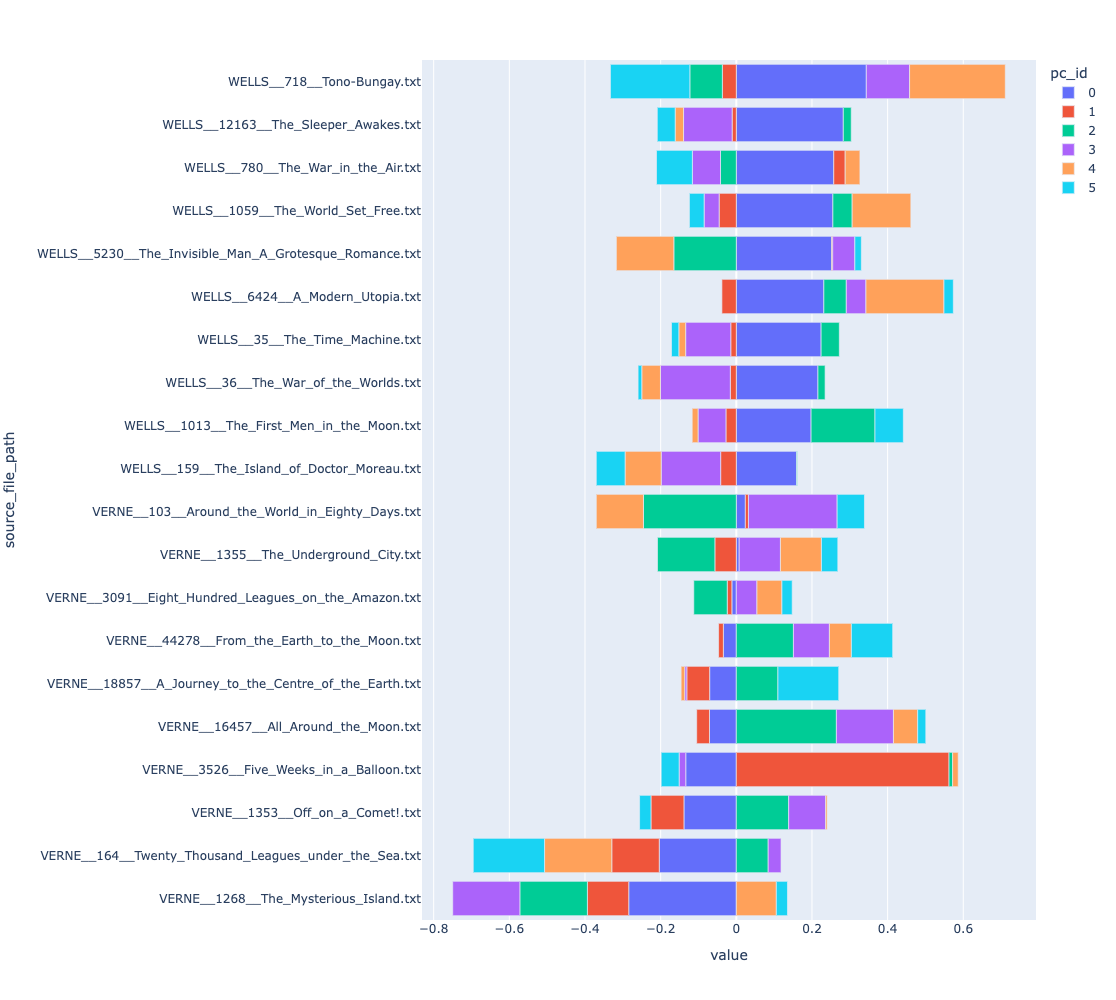

In [52]:
px.bar(BCM.sort_values(0), height=1000, orientation='h', barmode='relative')

In [53]:
print(C.loc[1, ['pos','neg']].values)

['captain island engineer granite vessel sea'
 'doctor balloon travellers lake gas country']


## Components by Authors

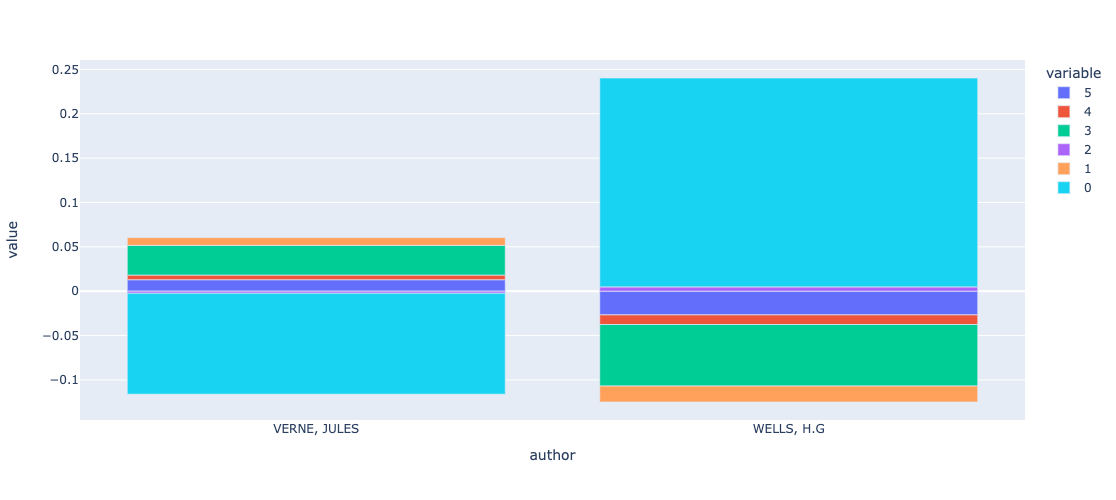

In [54]:
px.bar(DOC.groupby('author')[pc_ids].mean(), width=400, height=500)

## Components by Genre

In [55]:
#px.bar(DOC.groupby('genre')[pc_ids].mean(), width=800, height=500)

## Dendrograms

In [56]:
#import sys; sys.path.append(local_lib)
from hac2 import HAC

<Figure size 432x288 with 0 Axes>

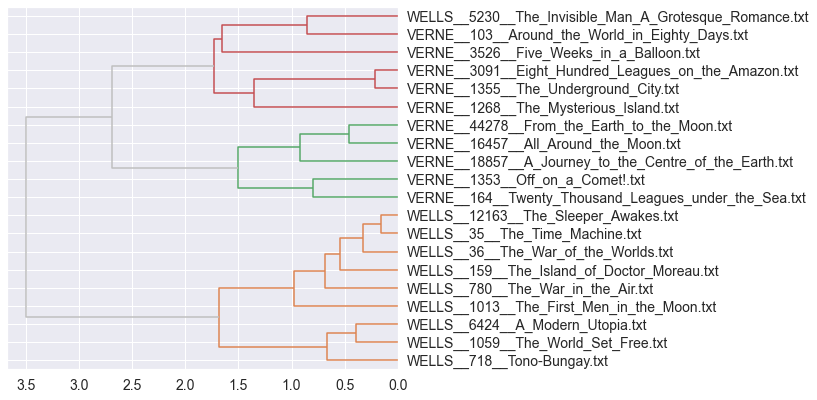

In [57]:
dend1 = HAC(BCM)
dend1.w = 7
dend1.color_thresh = 2.5
dend1.plot()

<Figure size 432x288 with 0 Axes>

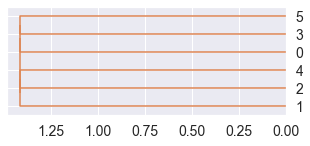

In [58]:
dend2 = HAC(DCM.T)
dend2.w = 5
dend2.color_thresh = 2
dend2.plot()

# Save

In [59]:
!ls {data_home}/output

DataDictionary.xlsx           wells-verne-GENSIM_DOCS.csv
VERNE-GENSIM_DOCS.csv         wells-verne-LDA_PHI-20.csv
VERNE-LDA_PHI-20.csv          wells-verne-LDA_THETA-20.csv
VERNE-LDA_THETA-20.csv        wells-verne-LDA_TOPIC-20.csv
VERNE-LDA_TOPIC-20.csv        wells-verne-LIB.csv
VERNE-VOCAB.csv               wells-verne-LIB2.csv
VERNE-W2V.csv                 wells-verne-PCA_COMPS.csv
WELLS-GENSIM_DOCS.csv         wells-verne-PCA_DCM.csv
WELLS-LDA_PHI-20.csv          wells-verne-PCA_THETA.csv
WELLS-LDA_THETA-20.csv        wells-verne-SA_SENT_TABLE.csv
WELLS-LDA_TOPIC-20.csv        wells-verne-SA_TABLE.csv
WELLS-VOCAB.csv               wells-verne-SIGS.csv
WELLS-W2V.csv                 wells-verne-TFIDF.csv
wells-verne-BOW.csv           wells-verne-TFIDF_REDUCED.csv
wells-verne-BOW_REDUCED.csv   wells-verne-VOCAB.csv
wells-verne-CORPUS.csv        wells-verne-VOCAB2.csv
wells-verne-CORPUS2.csv       wells-verne-W2V.csv
wells-verne-DTCM.csv          ~$DataDictionary.xlsx


In [60]:
LIB.to_csv(f"{data_home}/output/{data_prefix}-LIB2.csv")

In [61]:
C.to_csv(f"{data_home}/output/{data_prefix}-PCA_COMPS.csv")
L.to_csv(f"{data_home}/output/{data_prefix}-PCA_THETA.csv")
DCM.to_csv(f"{data_home}/output/{data_prefix}-PCA_DCM.csv")